Nama = Dimas Ramadhani

NIM = 4611422126

Mentor = Rusnanda Farhan

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pickle
import numpy as np

In [ ]:
file_path = "/content/drive/MyDrive/Celerates MSIB/ALL Dataset/adult_income.csv"

In [ ]:
df = pd.read_csv(file_path)
print (df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df = df.replace("?", "Unkonwn")

In [ ]:
missing_values_count = df.isin(["?"]).sum()

In [ ]:
print(missing_values_count)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
data_encoded.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Unkonwn,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,90,77053,9,0,4356,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,82,132870,9,0,4356,18,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,66,186061,10,0,4356,40,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,54,140359,4,0,3900,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,41,264663,10,0,3900,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 101 entries, age to income_>50K
dtypes: bool(95), int64(6)
memory usage: 4.4 MB


In [ ]:
y = data_encoded["income_>50K"]
X = data_encoded.drop(columns="income_>50K")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(22792, 100) (9769, 100)


In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.93      0.91      7429
        True       0.73      0.60      0.66      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



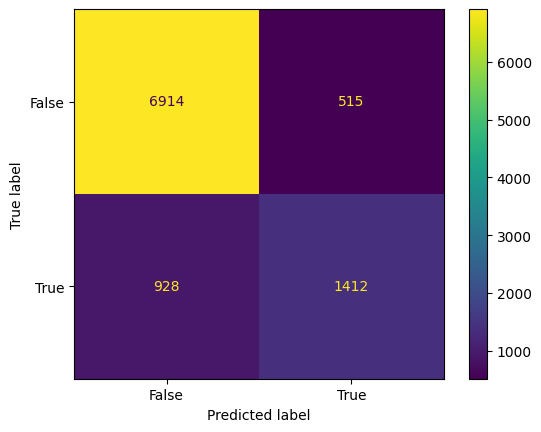

In [ ]:
#Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# Save model
pickle.dump(rf_model, open("/content/drive/MyDrive/Celerates MSIB/Machine Learning/Tugas Machine Learning 2/rf_model.pkl", "wb"))